<a href="https://colab.research.google.com/github/19pa1a0586/AI/blob/master/NLP_Assignment_1_for_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Assignment
In this assignment you will learn to do some data cleaning, prepare your features and do some K Means clustering on the data.

[Download data from here](https://drive.google.com/open?id=1ozz0zITDG8wOSQtwop2NC7AM_T3O59nj)

Load it as a pandas dataframe


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Loaded data as a pandas dataframe  
df=pd.read_csv("amazon_co-ecommerce_sample - amazon_co-ecommerce_sample.csv")
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop R

We are interested in customer_reviews column. However, the column is not clean data. It contains review title, rating, date, customer name, and review all in one scell separated by //

[Read this tutorial](https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/)

Extract the customer reviews in another dataframe and separate each of the components


In [92]:
# Check whether the customer_review column has null values or not
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     652
product_information                              58
product_description                             652
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

**After checking the customer_review column.we have 21 null values.As the customer_review column datatype is "object", we need to fill the null values with "Mode" values.**

In [93]:
# Filling (or) Replacing the nan values of customer_review column with mode values
df["customer_reviews"].fillna(df["customer_reviews"].value_counts().index[0],inplace=True)
# After Replacing the nan values of the customer_reviews column
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     652
product_information                              58
product_description                             652
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                  0
sellers                                        3082
dtype: int64

In [0]:
# We need to split (or) seperate the data in the "customer_reviews" column using the str.split() method
# Syntax: Series.str.split(pat=None, n=-1, expand=False)
new_set=df["customer_reviews"].str.split("//",n=4,expand=True)

# Creat Empty Dataframe to grop the splited (or) seperated data
cr=pd.DataFrame()

In [95]:
# Making seperate colunms with specified names from new_set dataframe
cr["review_title"]=new_set[0]
cr["rating"]=new_set[1]
cr["date"]=new_set[2]
cr["customer_name"]=new_set[3]
cr["review"]=new_set[4]
cr

,review_title,rating,date,customer_name,review
0,Worth Buying For The Pictures Alone (As Ever),4.0,6 April 2014,By\n \n Copnovelist\n \n on 6 April 2014,Part of the magic for me growing up as a boy ...
1,Four Stars,4.0,18 Dec. 2015,By\n \n kenneth bell\n \n on 18 Dec. 2...,Very happy with the communication with funkyb...
2,**Highly Recommended!**,5.0,26 May 2015,By\n \n Simon.B :-)\n \n on 26 May 2015,Simple & GREAT FUN for 5+My nephews face was ...
3,I love it,5.0,22 July 2013,By\n \n Lilla Lukacs\n \n on 22 July 2...,I love it. Perfect with the earlier ordered l...
4,Birthday present,5.0,14 April 2014,By\n \n Love my Dog\n \n on 14 April 2...,Bought this for my Grandson's birthday. He i...
...,...,...,...,...,...
9995,Realistic,5.0,31 Mar. 2014,By\n \n Ray\n \n on 31 Mar. 2014,Very true to the Batman classic series of the...
9996,... what I see my grandson us going to have fu...,4.0,9 Dec. 2014,By\n \n Janet R.\n \n on 9 Dec. 2014,Its a Christmas present however from what I s...
9997,Five Stars,5.0,18 Dec. 2015,By\n \n Amazon Customer\n \n on 18 Dec...,arrived in excellent condition
9998,The best sculpt in a while,5.0,13 May 2010,By\n \n Sodam Yat\n \n on 13 May 2010,"Okay, Hal Jordan figures come and go. There i..."


Now the customer name column needs to be cleaned. Extract only the customer name and remove the By and on part in similar manner. This time you need to split by '\n'

In [96]:
# We need to split (or) seperate the data in the "customer_name" column using the str.split() method
# Syntax: Series.str.split(pat=None, n=-1, expand=False)
new=cr["customer_name"].str.split("\n",n=3,expand=True)

# Making seperate colunm called "Customer_name" that contains only name of the customers from new dataframe
cr["Customer_name"]=new[2]

# Drop the "customer_name" column that contains differnt data which we don't want
rc=cr.drop("customer_name",axis=1)
rc

,review_title,rating,date,review,Customer_name
0,Worth Buying For The Pictures Alone (As Ever),4.0,6 April 2014,Part of the magic for me growing up as a boy ...,Copnovelist
1,Four Stars,4.0,18 Dec. 2015,Very happy with the communication with funkyb...,kenneth bell
2,**Highly Recommended!**,5.0,26 May 2015,Simple & GREAT FUN for 5+My nephews face was ...,Simon.B :-)
3,I love it,5.0,22 July 2013,I love it. Perfect with the earlier ordered l...,Lilla Lukacs
4,Birthday present,5.0,14 April 2014,Bought this for my Grandson's birthday. He i...,Love my Dog
...,...,...,...,...,...
9995,Realistic,5.0,31 Mar. 2014,Very true to the Batman classic series of the...,Ray
9996,... what I see my grandson us going to have fu...,4.0,9 Dec. 2014,Its a Christmas present however from what I s...,Janet R.
9997,Five Stars,5.0,18 Dec. 2015,arrived in excellent condition,Amazon Customer
9998,The best sculpt in a while,5.0,13 May 2010,"Okay, Hal Jordan figures come and go. There i...",Sodam Yat


Create another column nlpreview and copy the review column as it is
apply removal of punctuation and extract all words as a list of words. 

**Hint**: You may have to use [apply method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) on dataframe series with a lambda function that does your tokenization etc. You can use sentence/word tokenizer but you will get extra credit if you use RegExpTokenizer. [Documentation for help](https://kite.com/python/docs/nltk.tokenize)

In [97]:
# Here we have created another column "nlpreview" and copied the "review" column into the newly created column
rc["nlpreview"]=rc["review"]
rc

,review_title,rating,date,review,Customer_name,nlpreview
0,Worth Buying For The Pictures Alone (As Ever),4.0,6 April 2014,Part of the magic for me growing up as a boy ...,Copnovelist,Part of the magic for me growing up as a boy ...
1,Four Stars,4.0,18 Dec. 2015,Very happy with the communication with funkyb...,kenneth bell,Very happy with the communication with funkyb...
2,**Highly Recommended!**,5.0,26 May 2015,Simple & GREAT FUN for 5+My nephews face was ...,Simon.B :-),Simple & GREAT FUN for 5+My nephews face was ...
3,I love it,5.0,22 July 2013,I love it. Perfect with the earlier ordered l...,Lilla Lukacs,I love it. Perfect with the earlier ordered l...
4,Birthday present,5.0,14 April 2014,Bought this for my Grandson's birthday. He i...,Love my Dog,Bought this for my Grandson's birthday. He i...
...,...,...,...,...,...,...
9995,Realistic,5.0,31 Mar. 2014,Very true to the Batman classic series of the...,Ray,Very true to the Batman classic series of the...
9996,... what I see my grandson us going to have fu...,4.0,9 Dec. 2014,Its a Christmas present however from what I s...,Janet R.,Its a Christmas present however from what I s...
9997,Five Stars,5.0,18 Dec. 2015,arrived in excellent condition,Amazon Customer,arrived in excellent condition
9998,The best sculpt in a while,5.0,13 May 2010,"Okay, Hal Jordan figures come and go. There i...",Sodam Yat,"Okay, Hal Jordan figures come and go. There i..."


In [98]:
# Here we have imported "Regular-Expression Tokenizer" to split the sentence into list of words with space
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\S+')
nlp=rc["nlpreview"].apply(lambda x:tokenizer.tokenize(str(x)))
nlp

0       [Part, of, the, magic, for, me, growing, up, a...
1       [Very, happy, with, the, communication, with, ...
2       [Simple, &, GREAT, FUN, for, 5+My, nephews, fa...
3       [I, love, it., Perfect, with, the, earlier, or...
4       [Bought, this, for, my, Grandson's, birthday.,...
                              ...                        
9995    [Very, true, to, the, Batman, classic, series,...
9996    [Its, a, Christmas, present, however, from, wh...
9997                  [arrived, in, excellent, condition]
9998    [Okay,, Hal, Jordan, figures, come, and, go., ...
9999    [1st, class, kit, top, marks, to, bandai, if, ...
Name: nlpreview, Length: 10000, dtype: object

Remove stopwords in the nlpreview column

In [99]:
# Here we have imported "stopwords" nd "punctuation" and grouped them as a set into "customStopWords"
from nltk.corpus import stopwords 
nltk.download('stopwords')
from string import punctuation   
customStopWords=set(stopwords.words('english')+list(punctuation))   



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
# Here we have created an "words" with empty list and removed "stopwords" nd "punctuation" from the sentences and then assigned the
# remaining words into the created "words" list.  
words=[]
for i in range(10000):
  for j in range(len(nlp[i])):
    if nlp[i][j] not in customStopWords:
      words.append(nlp[i][j])
len(words)

989212

Use stemming/lemmatization. There are several options, so [read the docs](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python).

In [101]:
# Here we are finding "stemm_words" (or) "root_words" from the previously created "words" list
from nltk.stem.lancaster import LancasterStemmer
st=LancasterStemmer()
stemm_Words=[st.stem(word) for word in words]
stemm_Words

['part',
 'mag',
 'grow',
 'boy',
 'buy',
 '(or',
 'given)',
 'new',
 'hornby',
 'catalog',
 'every',
 'year,',
 'ev',
 'includ',
 '90%',
 'produc',
 'prevy',
 'year.',
 "i've",
 'stil',
 'got',
 'old',
 'on',
 'dat',
 'back',
 '70s',
 '80s',
 'somewhere.',
 'thes',
 'day',
 'catalog',
 'espec',
 'inform',
 'tel',
 'vint',
 'rol',
 'stock',
 'us',
 'ded',
 'railway',
 'on',
 'particul',
 'er',
 'train',
 'company.',
 'amaz',
 'detail',
 'fab',
 'photography.',
 '//',
 '5.0',
 '//',
 '11',
 'april',
 '2015',
 '//',
 'by',
 'richard',
 '11',
 'april',
 '2015',
 '//',
 'amaz',
 'detail,',
 'every',
 'credit',
 'photograph',
 'book,',
 'worthy',
 'ref',
 'manual,',
 'wel',
 'sal',
 'brochure.',
 'ev',
 'pass',
 'interest',
 'hobby',
 'transport',
 'anoth',
 'tim',
 'young',
 'aw',
 'big',
 'trains.',
 "'great",
 "purchase'",
 '//',
 '5.0',
 '//',
 '23',
 'april',
 '2014',
 '//',
 'by',
 'pinkhandb',
 '23',
 'april',
 '2014',
 '//',
 'thi',
 'purchas',
 'behalf',
 'dad.',
 'he',
 'alway',
 

In [102]:
# Here we are finding lemmatized_words and lemmatization keeps words sensible
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def get_lemma(words):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for word in words:
        lemma.append(wordnet_lemmatizer.lemmatize(word))
    return lemma
word=get_lemma(words)
word

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Part',
 'magic',
 'growing',
 'boy',
 'buy',
 '(or',
 'given)',
 'new',
 'Hornby',
 'catalogue',
 'every',
 'year,',
 'even',
 'included',
 '90%',
 'product',
 'previous',
 'year.',
 "I've",
 'still',
 'got',
 'old',
 'one',
 'dating',
 'back',
 '70',
 '80',
 'somewhere.',
 'These',
 'day',
 'catalogue',
 'especially',
 'informative',
 'tell',
 'vintage',
 'rolling',
 'stock',
 'useful',
 'dedicating',
 'railway',
 'one',
 'particular',
 'era',
 'train',
 'company.',
 'Amazing',
 'detail',
 'fabulous',
 'photography.',
 '//',
 '5.0',
 '//',
 '11',
 'April',
 '2015',
 '//',
 'By',
 'richard',
 '11',
 'April',
 '2015',
 '//',
 'Amazing',
 'detail,',
 'every',
 'credit',
 'photographer',
 'book,',
 'worthy',
 'reference',
 'manual,',
 'well',
 'sale',
 'brochure.',
 'even',
 'passing',
 'interest',
 'hobby',
 'transported',
 'another',
 'time',
 'younger',
 'awe',
 'big',
 'trains.',
 "'Great",
 "Purchase'",
 '//',
 '5.0',
 '//',
 '23',
 'April',
 '2014',
 '//',
 'By',
 'Pinkhandbag',
 

Find the first 100 most important words, i.e. most frequently used words and plot them using FreqDist plot in nltk. See the sample colab file given during class. Note your observations.

In [0]:
# Calculates the frequency distribution for each word in the data. Use nltk.probability from FreqDist and matplotlib.
from nltk.probability import FreqDist

def plot_freq_dist(words,num_words = 20):
    plt.figure(figsize=(20,5))
    fdist = FreqDist(words)
    fdist.plot(num_words,cumulative=False)   

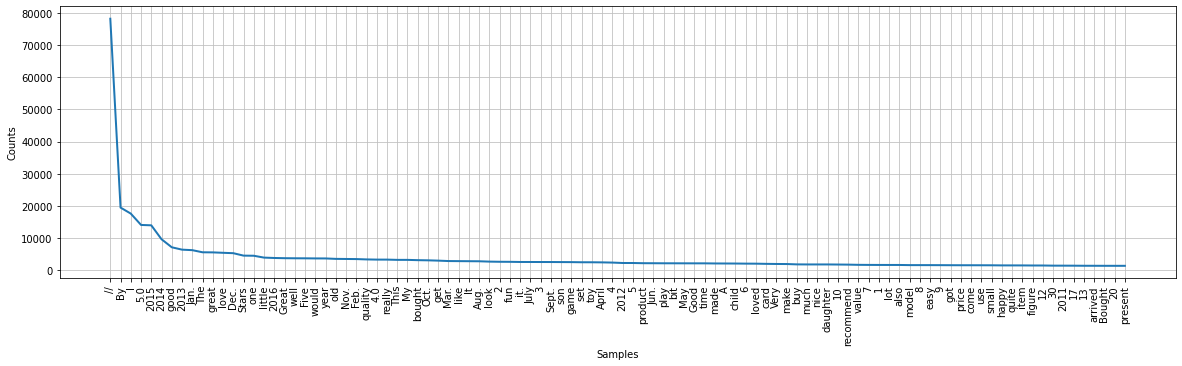

In [104]:
plot_freq_dist(word,num_words=100) 

Create another column called TFIDF and use the nlpreview to construct tfidf in this newly created column

In [0]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

def get_bag_of_words(sentences):
    vectorizer = CountVectorizer()
    print(vectorizer.fit_transform(sentences).todense())
    print(vectorizer.vocabulary_) 
    print(vectorizer.get_feature_names())

In [106]:
get_bag_of_words(rc["nlpreview"])

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'part': 23277, 'of': 22440, 'the': 31781, 'magic': 19462, 'for': 12555, 'me': 20207, 'growing': 14130, 'up': 33518, 'as': 2699, 'boy': 4698, 'was': 34298, 'to': 32295, 'buy': 5318, 'or': 22703, 'be': 3585, 'given': 13495, 'new': 21878, 'hornby': 15391, 'catalogue': 5793, 'every': 11192, 'year': 35330, 'even': 11168, 'if': 15754, 'it': 16558, 'included': 15987, '90': 1000, 'same': 27492, 'products': 24932, 'previous': 24785, 've': 33761, 'still': 30383, 'got': 13776, 'my': 21528, 'old': 22511, 'ones': 22581, 'dating': 8482, 'back': 3143, '70s': 897, 'and': 2119, '80s': 956, 'somewhere': 29509, 'these': 31883, 'days': 8543, 'is': 16520, 'especially': 11074, 'informative': 16125, 'in': 15947, 'that': 31771, 'tells': 31617, 'you': 35403, 'vintage': 33971, 'rolling': 27012, 'stock': 30419, 'which': 34614, 'useful': 33597, 'are': 2524, 'dedicating': 8713, 'your': 35424, 'r

In [107]:
max(rc["nlpreview"])

' 😊'

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(stop_words='english')
TFIDF= vectorizer.fit_transform(rc["nlpreview"])
print(TFIDF)
print(type(TFIDF))

  (0, 30674)	0.044044795885449656
  (0, 25139)	0.04837432634386567
  (0, 24720)	0.06306384659857728
  (0, 5241)	0.09918060581972027
  (0, 18071)	0.06720813814079883
  (0, 15270)	0.09495521586133153
  (0, 35041)	0.03868474929781323
  (0, 29984)	0.060481122666611604
  (0, 29276)	0.09918060581972027
  (0, 15990)	0.06965542356715876
  (0, 8451)	0.06584693295665081
  (0, 22236)	0.0636250483676948
  (0, 24537)	0.05559906865455348
  (0, 6391)	0.03169148805106952
  (0, 12892)	0.05377893411038312
  (0, 16099)	0.09195725397549168
  (0, 11414)	0.04873998630371567
  (0, 8473)	0.037006830524012296
  (0, 19598)	0.06487946948707354
  (0, 357)	0.07477560132267441
  (0, 5734)	0.09918060581972027
  (0, 3188)	0.07245102775722906
  (0, 8446)	0.05668820530017386
  (0, 8576)	0.10919590008567892
  (0, 21771)	0.056538158119833135
  :	:
  (9999, 31676)	0.1043439563576452
  (9999, 10784)	0.05217319207128046
  (9999, 22320)	0.03915086470477344
  (9999, 43)	0.04912292639530133
  (9999, 13257)	0.044242282801336116

In [109]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000000',
 '00201chess',
 '00262',
 '007',
 '007th',
 '009',
 '00am',
 '00bay',
 '00wbx6zdn4whkg2514ex',
 '01',
 '01772jane',
 '02',
 '02425',
 '02431',
 '02754',
 '0275615',
 '03',
 '03050',
 '03nj3eegg4pfr9z0evpg',
 '04',
 '05',
 '06',
 '07',
 '070913gt',
 '08',
 '09',
 '0908713',
 '0_lisa_0',
 '0dsmtqxe1qhdgb2yr2nc',
 '0e1t6654m0j89np4kf3w',
 '0e9cs6j88jgwbm74zrav',
 '0ex0f2b9hbvwkba6cx25',
 '0f6j4mcntpsw5mk87589',
 '0mp',
 '0mvt6x13m4hjz3nq3tdf',
 '0q67z0smwrv8gr4qz1rb',
 '0qp39g6afys9y12et7fp',
 '0s',
 '0tsx09xrrxqw87s3r1v1',
 '0x1',
 '10',
 '100',
 '1000',
 '10000',
 '1000pc',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yrs',
 '101',
 '1010',
 '101231',
 '103',
 '104',
 '105',
 '1077',
 '107g',
 '1080p',
 '108mv8czqckjkqcac4ar',
 '109',
 '10cant',
 '10cm',
 '10colours',
 '10ft',
 '10jun14',
 '10kgs',
 '10m',
 '10mins',
 '10minute',
 '10minutes',
 '10mm',
 '10mph',
 '10p',
 '10pm',
 '10pound',
 '10pounds',
 '10s',
 '10th',
 '10would',
 '10x5',
 '10x7',
 '10yo',
 '

Find the top 100 words with maximum TF IDF score and plot it. Note your observations and see how different it is from the Top 100 highest frequency words.

In [0]:
# Calculates the frequency distribution for each word in the data. Use nltk.probability from FreqDist and matplotlib.
from nltk.probability import FreqDist

def plot_freq_dist(TFIDF,num_words = 20):
    plt.figure(figsize=(20,5))
    fdist = FreqDist(words)
    fdist.plot(num_words,cumulative=False)   

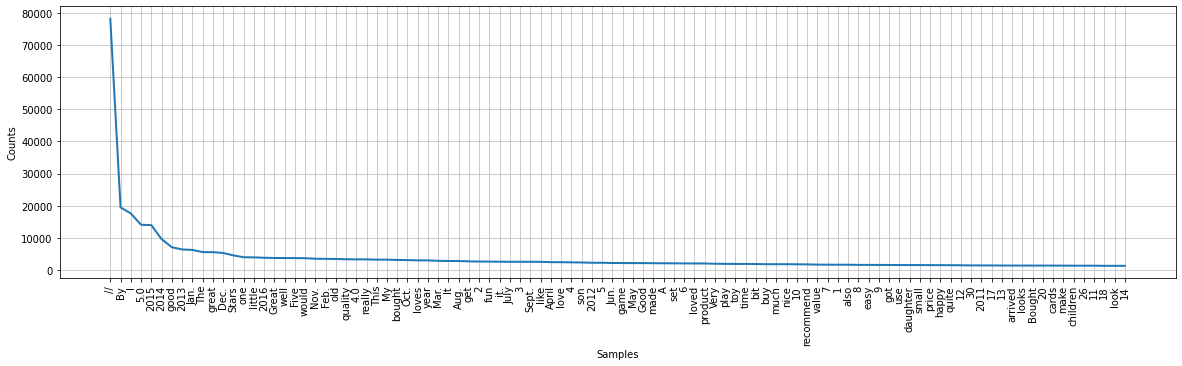

In [111]:
plot_freq_dist(TFIDF,num_words=100) 

Use KMeans clustering to apply clustering to this TFIDF column. Find optimal number of clusters using elbow plot and note your observations for the optimal clusters.

In [0]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 1, verbose = True)

In [113]:
km.fit(TFIDF)

Initialization complete
Iteration  0, inertia 18735.761
Iteration  1, inertia 9594.809
Iteration  2, inertia 9525.809
Iteration  3, inertia 9502.159
Iteration  4, inertia 9490.545
Iteration  5, inertia 9483.966
Iteration  6, inertia 9481.779
Iteration  7, inertia 9480.360
Iteration  8, inertia 9479.786
Iteration  9, inertia 9479.480
Iteration 10, inertia 9479.218
Iteration 11, inertia 9479.121
Iteration 12, inertia 9479.053
Iteration 13, inertia 9478.986
Iteration 14, inertia 9478.896
Iteration 15, inertia 9478.833
Iteration 16, inertia 9478.790
Iteration 17, inertia 9478.761
Iteration 18, inertia 9478.730
Iteration 19, inertia 9478.706
Iteration 20, inertia 9478.681
Iteration 21, inertia 9478.645
Iteration 22, inertia 9478.603
Iteration 23, inertia 9478.555
Iteration 24, inertia 9478.513
Iteration 25, inertia 9478.463
Iteration 26, inertia 9478.393
Iteration 27, inertia 9478.295
Iteration 28, inertia 9478.199
Iteration 29, inertia 9478.111
Iteration 30, inertia 9478.051
Iteration 31, 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=True)

In [115]:
sorted(zip(km.labels_,rc["nlpreview"]))

[(0, ' ALL GOOD THANK YOU'),
 (0, ' All good.'),
 (0, ' All very good, Thank You very much'),
 (0,
  ' Arrived in good time. All good and works well. Son is very happy. Thank you.'),
 (0, ' Arrived on time,of good quality and value for money.'),
 (0, ' As expected, good service'),
 (0, ' Excellent. Always good quality and always on time.'),
 (0, ' GOOD'),
 (0, ' GOOD QUALITY ITEM!'),
 (0, ' Good'),
 (0, ' Good'),
 (0, ' Good'),
 (0, ' Good'),
 (0, ' Good'),
 (0, ' Good'),
 (0, ' Good'),
 (0, ' Good'),
 (0, ' Good'),
 (0, ' Good'),
 (0, ' Good'),
 (0, ' Good'),
 (0, ' Good'),
 (0, ' Good and easy to use'),
 (0, ' Good car'),
 (0, ' Good detail'),
 (0, ' Good fun'),
 (0, ' Good fun'),
 (0, ' Good fun.'),
 (0, ' Good item well pleased,good service.'),
 (0, ' Good price & delivery'),
 (0, ' Good product'),
 (0, ' Good product'),
 (0, ' Good product'),
 (0, ' Good product and service'),
 (0, ' Good product, as expected.'),
 (0, ' Good product, good value, good service. Thank you'),
 (0, ' G

# visualize your clusters
 Let us use word cloud visualization.

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plotwordcloud(words):
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(words)) 
  plt.figure(figsize=(10, 7)) 
  plt.imshow(wordcloud, interpolation="bilinear") 
  plt.axis('off') 
  plt.show()

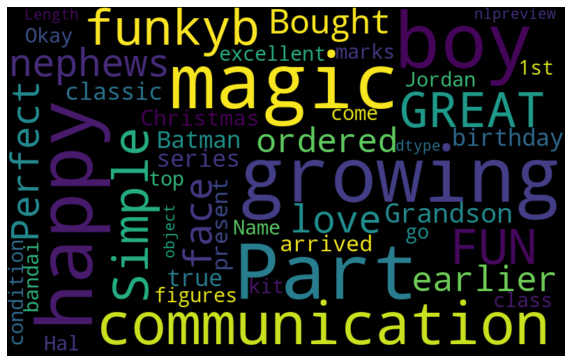

In [160]:
plotwordcloud(str(rc["nlpreview"]))

In [129]:
rc["nlpreview"]

0        Part of the magic for me growing up as a boy ...
1        Very happy with the communication with funkyb...
2        Simple & GREAT FUN for 5+My nephews face was ...
3        I love it. Perfect with the earlier ordered l...
4        Bought this for my Grandson's birthday.  He i...
                              ...                        
9995     Very true to the Batman classic series of the...
9996     Its a Christmas present however from what I s...
9997                       arrived in excellent condition
9998     Okay, Hal Jordan figures come and go. There i...
9999     1st class kit top marks to bandai if your not...
Name: nlpreview, Length: 10000, dtype: object

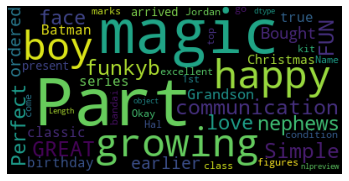

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud=WordCloud().generate(str(rc["nlpreview"]))
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [118]:
print(rc["nlpreview"])

0        Part of the magic for me growing up as a boy ...
1        Very happy with the communication with funkyb...
2        Simple & GREAT FUN for 5+My nephews face was ...
3        I love it. Perfect with the earlier ordered l...
4        Bought this for my Grandson's birthday.  He i...
                              ...                        
9995     Very true to the Batman classic series of the...
9996     Its a Christmas present however from what I s...
9997                       arrived in excellent condition
9998     Okay, Hal Jordan figures come and go. There i...
9999     1st class kit top marks to bandai if your not...
Name: nlpreview, Length: 10000, dtype: object


In [0]:
# your code here to call plotwordcloud for concatenated word set of each cluster. You need to find all words of a cluster and create a set.

#Sentiment Analysis
Ideally it is difficult to do sentiment analysis without having labeled data.

We can do following:
1. Use the rating column and rate 1,2 as negative and 4,5 as positive and reject 3 for now. Then we do 70/30 split of our data into train/test set 
2. Use a lexicon of positive and negative words and calculate score of each review using high score for positive and low score for negative review and pick a threshold above which a review is positive. We can find known positive or negative words in a review and sum their scores up to get a final score.

However, note that text is tricky:

E.g. consider a sentence in review of a smart watch: *The product is not only good but also does not spoil in water.*

It is a positive review but has lot of negaive words not, spoil etc. In these cases one has to go for bi or tri grams, e.g. *not only good* is a positive trigram. *does not spoil* is another one. However adding trigrams make your problem tough. If a review has 10 words, it will have 7 trigrams and 8 bigrams in it, making the features more.


In [0]:
# create a column sentiment with 0 meaning negative and 1 meaning positive and construct this based on the rule in point 1 above.

Read [this stack overflow post](https://stackoverflow.com/questions/47778403/computing-tf-idf-on-the-whole-dataset-or-only-on-training-data). It tells you how to create you train and test data.

In [0]:
# shuffle and split your data in train test (70/30) with tfidf as your features and sentiment as your labels

In [0]:
# plot word clourds for positive and negative training examples

In [0]:
# use and supervised classification approach of your choice and report your accuracy

Evaluate your model by trying your own reviews.

Process will be:
1. Calculate tf-idf of the review using [transform() method](https://stackoverflow.com/questions/47778403/computing-tf-idf-on-the-whole-dataset-or-only-on-training-data)
2. run your model on the tf-idf vector and see the sentiment predicted.

In [0]:
# try your model on new data ie. your own cooked up data say some review that you write

# Approach 2 - Lexicon way
We will try the lexicons. Rather than doing the work on our own we shall use built in lexicons in NLTK.
You can [read about vader here](http://datameetsmedia.com/staging/3908/vader-sentiment-analysis-explained/)

In [0]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [0]:
sentiment_analyzer = SentimentIntensityAnalyzer()
scores = []
# for each review in your dataframe (here we need full review and not bother about removing stopwords, punctuations etc. In fact vader needs them!)
# your loop statement e.g., for sentence in ????
     #print(sentence)
     sentiment_score = sentiment_analyzer.polarity_scores(sentence)
     scores.append(sentiment_score)

# let us see first 10 results. You can change this code to see more.
for sentiment_score in scores[:10]:
  for score in sentiment_score:
         print('{0}: {1},' .format(score, sentiment_score[score]), end='')

You can analyze the outcomes. See what threshold you want to pick!